<a href="https://colab.research.google.com/github/Mohd3/Circular-Linked-List/blob/main/ANN_For_Smoke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN For Smoke Detection

In this project, I will make a deep learning model to detect smoke, and with the help of plots, I will answer some questions, such as what are the factors most associated with the presence or absence of smoke and show the relationships between them.

In [2]:
pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Mohammad.zaiter\\Anaconda3\\Lib\\site-packages\\~~learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [10]:
smoke_detection = pd.read_csv('smoke_detection_iot.csv')
smoke_detection

Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400   12306        18520        939.735   0.00   0.00   0.00   
1            400   12345        18651        939.744   0.00   0.00   0.00   
2            400   12374        18764        939.738   0.00   0.00   0.00   
3            400   12390        18849        939.736   0.00   0.00   0.00   
4            400   12403        18921        939.744   0.00   0.00   0.00   
...          ...     ...          ...            ...    ...    ...    ...   
62625        400   13723        20569        936.670   0.63   0.65   4.32   
62626        400   13731        20588        936.678   0.61   0.63   4.18   
62627        400   13725        20582        936.687   0.57   0.60   3.95   
62628        400   13712        20566        936.680   0.57   0.59   3.92   
62629        400   13696        20543        936.676   0.57   0.59   3.90   

       NC1.0  NC2.5   CNT  Fire Alarm  
0      0.000  0.000     0           0  
1      0.000  0.000     1           0  
2      0.000  0.000     2           0  
3      0.000  0.000     3           0  
4      0.000  0.000     4           0  
...      ...    ...   ...         ...  
62625  0.673  0.015  5739           0  
62626  0.652  0.015  5740           0  
62627  0.617  0.014  5741           0  
62628  0.611  0.014  5742           0  
62629  0.607  0.014  5743           0  

[62630 rows x 16 columns]

In [47]:
smoke_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [48]:
smoke_detection.describe().transpose()

count          mean            std           min  \
Unnamed: 0      62630.0  3.131450e+04   18079.868017  0.000000e+00   
UTC             62630.0  1.654792e+09  110002.488078  1.654712e+09   
Temperature[C]  62630.0  1.597042e+01      14.359576 -2.201000e+01   
Humidity[%]     62630.0  4.853950e+01       8.865367  1.074000e+01   
TVOC[ppb]       62630.0  1.942058e+03    7811.589055  0.000000e+00   
eCO2[ppm]       62630.0  6.700210e+02    1905.885439  4.000000e+02   
Raw H2          62630.0  1.294245e+04     272.464305  1.066800e+04   
Raw Ethanol     62630.0  1.975426e+04     609.513156  1.531700e+04   
Pressure[hPa]   62630.0  9.386276e+02       1.331344  9.308520e+02   
PM1.0           62630.0  1.005943e+02     922.524245  0.000000e+00   
PM2.5           62630.0  1.844678e+02    1976.305615  0.000000e+00   
NC0.5           62630.0  4.914636e+02    4265.661251  0.000000e+00   
NC1.0           62630.0  2.035865e+02    2214.738556  0.000000e+00   
NC2.5           62630.0  8.004904e+01    1083.383189  0.000000e+00   
CNT             62630.0  1.051139e+04    7597.870997  0.000000e+00   
Fire Alarm      62630.0  7.146256e-01       0.451596  0.000000e+00   

                         25%           50%           75%           max  
Unnamed: 0      1.565725e+04  3.131450e+04  4.697175e+04  6.262900e+04  
UTC             1.654743e+09  1.654762e+09  1.654778e+09  1.655130e+09  
Temperature[C]  1.099425e+01  2.013000e+01  2.540950e+01  5.993000e+01  
Humidity[%]     4.753000e+01  5.015000e+01  5.324000e+01  7.520000e+01  
TVOC[ppb]       1.300000e+02  9.810000e+02  1.189000e+03  6.000000e+04  
eCO2[ppm]       4.000000e+02  4.000000e+02  4.380000e+02  6.000000e+04  
Raw H2          1.283000e+04  1.292400e+04  1.310900e+04  1.380300e+04  
Raw Ethanol     1.943500e+04  1.950100e+04  2.007800e+04  2.141000e+04  
Pressure[hPa]   9.387000e+02  9.388160e+02  9.394180e+02  9.398610e+02  
PM1.0           1.280000e+00  1.810000e+00  2.090000e+00  1.433369e+04  
PM2.5           1.340000e+00  1.880000e+00  2.180000e+00  4.543226e+04  
NC0.5           8.820000e+00  1.245000e+01  1.442000e+01  6.148203e+04  
NC1.0           1.384000e+00  1.943000e+00  2.249000e+00  5.191468e+04  
NC2.5           3.300000e-02  4.400000e-02  5.100000e-02  3.002644e+04  
CNT             3.625250e+03  9.336000e+03  1.716475e+04  2.499300e+04  
Fire Alarm      0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

In [11]:
smoke_detection = smoke_detection.drop(['Unnamed: 0','UTC','CNT'], axis = 1)

In [50]:
fig = px.scatter(smoke_detection, x="Raw Ethanol", y="TVOC[ppb]",color='Fire Alarm')
fig.show()

In [51]:
fig = px.scatter(smoke_detection, x="Humidity[%]", y="TVOC[ppb]",color='Fire Alarm')
fig.show()

In [52]:
fig = px.scatter(smoke_detection, x="Raw Ethanol", y="Raw H2",color='Fire Alarm')
fig.show()

In [53]:
smoke_detection.head()

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0          20.000        57.36          0        400   12306        18520   
1          20.015        56.67          0        400   12345        18651   
2          20.029        55.96          0        400   12374        18764   
3          20.044        55.28          0        400   12390        18849   
4          20.059        54.69          0        400   12403        18921   

   Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
0        939.735    0.0    0.0    0.0    0.0    0.0           0  
1        939.744    0.0    0.0    0.0    0.0    0.0           0  
2        939.738    0.0    0.0    0.0    0.0    0.0           0  
3        939.736    0.0    0.0    0.0    0.0    0.0           0  
4        939.744    0.0    0.0    0.0    0.0    0.0           0

**Null Values**

In [29]:
smoke_detection.isnull().sum()

Temperature[C]    0
Humidity[%]       0
eCO2[ppm]         0
Pressure[hPa]     0
NC2.5             0
Fire Alarm        0
dtype: int64

**Outliers**

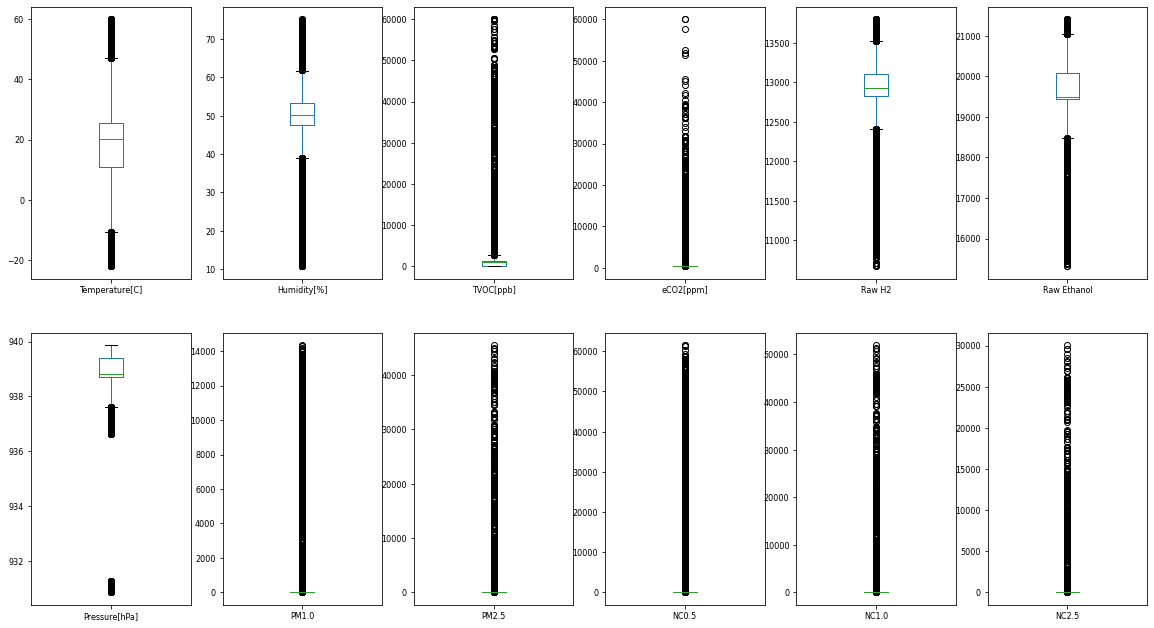

In [18]:
smoke_detection.drop('Fire Alarm', axis=1).plot(kind='box', subplots=True
 , layout=(2,6), sharex=False, legend=True, fontsize=8, figsize=(20,11))
plt.show()

In [12]:
cols = smoke_detection
Q1 = cols. quantile(0.25)
Q3 = cols. quantile(0.75)
IQR = Q3 - Q1
print("Old Shape: ", smoke_detection.shape)
smoke_detection = cols[~((cols < (Q1 - 1.5 * IQR)) |(cols > (Q3 + 1.5 * IQR))). any(axis=1)]
print("New Shape: ", smoke_detection.shape)

Old Shape:  (62630, 13)
New Shape:  (35689, 13)


In [20]:
print("Duplicated: ",smoke_detection.duplicated().sum())

Duplicated:  0


# Modeling

<AxesSubplot:>

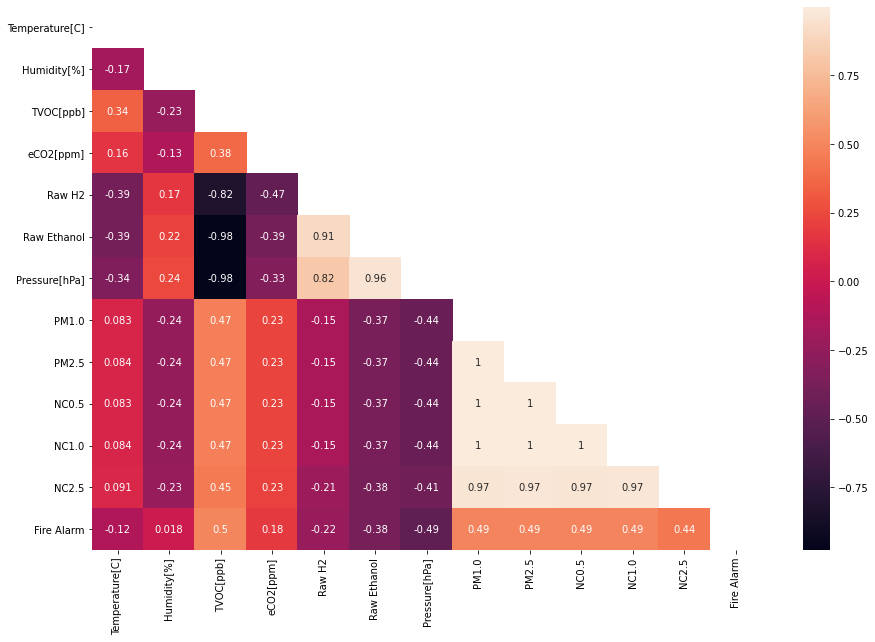

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(smoke_detection.corr(),annot=True,mask=np.triu(np.ones_like(smoke_detection.corr())))

In [13]:
smoke_detection.drop(columns = ['TVOC[ppb]','Raw H2','Raw Ethanol',
                                'PM1.0','PM2.5','NC0.5','NC1.0'],axis = 1,inplace =True)

In [5]:
fig = px.pie(smoke_detection, names=smoke_detection['Fire Alarm'], title='Target Variable')
fig.show() #imbalanced!

In [6]:
smoke_detection['Fire Alarm'].value_counts()

1    30797
0     4892
Name: Fire Alarm, dtype: int64

In [14]:
x = smoke_detection.iloc[:,:5].values
y = smoke_detection['Fire Alarm'].values
pd.DataFrame(x)

0      1      2        3      4
0      23.056  51.11  400.0  939.810  0.056
1      23.131  50.08  400.0  939.813  0.074
2      23.142  50.00  400.0  939.790  0.072
3      23.153  49.85  400.0  939.791  0.074
4      23.163  49.71  400.0  939.812  0.073
...       ...    ...    ...      ...    ...
35684  24.173  44.99  415.0  937.630  0.053
35685  24.212  45.00  426.0  937.634  0.053
35686  24.251  45.00  414.0  937.624  0.053
35687  24.329  42.89  415.0  937.625  0.052
35688  24.405  41.35  413.0  937.625  0.053

[35689 rows x 5 columns]

In [15]:
ros = RandomOverSampler(random_state=42)
x, y = ros.fit_resample(x, y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43115, 5), (18479, 5), (43115,), (18479,))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
sum(y_train == 1)

21628

In [19]:
sum(y_train == 0)

21487

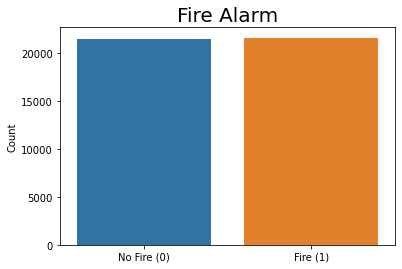

In [20]:
sns.countplot(x = y_train)
plt.xticks([0, 1], ['No Fire (0)', 'Fire (1)'])
plt.ylabel('Count')
plt.title('Fire Alarm', fontsize = 20)
plt.show()

### Model 1

In [24]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(20,input_shape=(5,)))
model2.add(keras.layers.Dense(20,activation="tanh"))
model2.add(keras.layers.Dense(1,activation="sigmoid"))

In [25]:
model2.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])


In [26]:
history=model2.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 5s 3ms/step - loss: 0.1696 - Accuracy: 0.9481 - val_loss: 0.1100 - val_Accuracy: 0.9681
Epoch 2/15
1348/1348 [==============================] - 4s 3ms/step - loss: 0.0954 - Accuracy: 0.9716 - val_loss: 0.0782 - val_Accuracy: 0.9761
Epoch 3/15
1348/1348 [==============================] - 4s 3ms/step - loss: 0.0722 - Accuracy: 0.9789 - val_loss: 0.0634 - val_Accuracy: 0.9818
Epoch 4/15
1348/1348 [==============================] - 4s 3ms/step - loss: 0.0580 - Accuracy: 0.9836 - val_loss: 0.0506 - val_Accuracy: 0.9851
Epoch 5/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0467 - Accuracy: 0.9868 - val_loss: 0.0411 - val_Accuracy: 0.9887
Epoch 6/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0402 - Accuracy: 0.9885 - val_loss: 0.0373 - val_Accuracy: 0.9910
Epoch 7/15
1348/1348 [==============================] - 5s 3ms/step - loss: 0.0362 - Accuracy: 0.9896 - val_loss: 0.0332 - val_Accuracy:

In [27]:
scores=model2.evaluate(X_test,y_test)

578/578 [==============================] - 2s 3ms/step - loss: 0.0200 - Accuracy: 0.9930


In [28]:
y_pred = model2.predict(X_test)
y_pred


578/578 [==============================] - 1s 2ms/step


array([[8.3430932e-05],
       [9.9982804e-01],
       [4.7338434e-04],
       ...,
       [7.6975324e-05],
       [9.9947453e-01],
       [5.4925904e-02]], dtype=float32)

In [29]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9269   41]
 [  88 9081]]


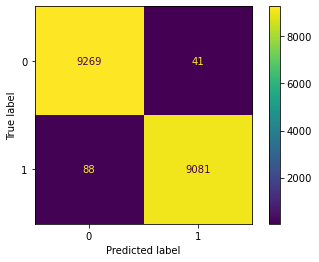

In [31]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9930191027653011

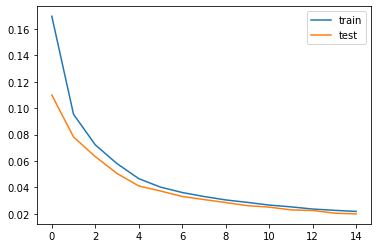

In [33]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

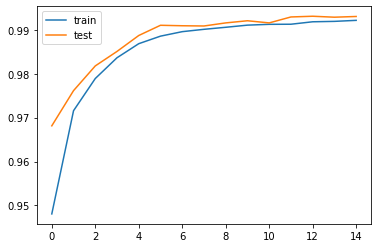

In [34]:
from matplotlib import pyplot
pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [35]:
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))


Accuracy: 99.30%


### Model 2

In [36]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(30,input_shape=(5,)))
model3.add(keras.layers.Dense(30,activation="relu"))
model3.add(keras.layers.Dense(2,activation="softmax"))

In [37]:
model3.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['Accuracy'])

In [38]:
history=model3.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1398 - Accuracy: 0.9590 - val_loss: 0.1035 - val_Accuracy: 0.9701
Epoch 2/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0929 - Accuracy: 0.9721 - val_loss: 0.0762 - val_Accuracy: 0.9758
Epoch 3/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0689 - Accuracy: 0.9776 - val_loss: 0.0566 - val_Accuracy: 0.9798
Epoch 4/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0501 - Accuracy: 0.9828 - val_loss: 0.0434 - val_Accuracy: 0.9846
Epoch 5/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0397 - Accuracy: 0.9855 - val_loss: 0.0358 - val_Accuracy: 0.9865
Epoch 6/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0335 - Accuracy: 0.9880 - val_loss: 0.0304 - val_Accuracy: 0.9907
Epoch 7/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0293 - Accuracy: 0.9901 - val_loss: 0.0270 - val_Accuracy:

In [39]:
scores=model3.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.0185 - Accuracy: 0.9944


In [40]:
y_pred = model3.predict(X_test)
y_pred


578/578 [==============================] - 1s 997us/step


array([[1.0000000e+00, 1.5346889e-11],
       [1.1515431e-13, 1.0000000e+00],
       [9.9998653e-01, 1.3471034e-05],
       ...,
       [1.0000000e+00, 5.8967440e-12],
       [1.1387498e-04, 9.9988616e-01],
       [9.8474890e-01, 1.5251077e-02]], dtype=float32)

In [41]:
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9298   12]
 [  91 9078]]


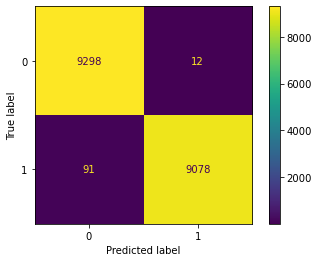

In [43]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9944261053087289

In [45]:
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))


Accuracy: 99.44%


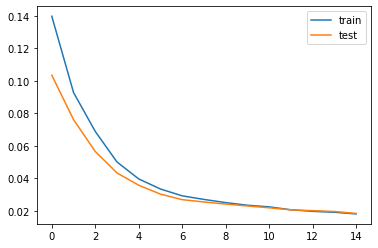

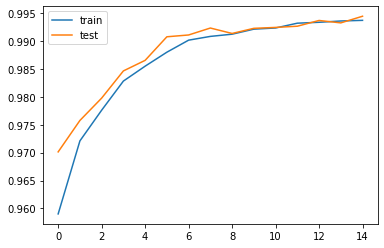

In [46]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

### Model 3

In [47]:

model4 = keras.Sequential()
model4.add(keras.layers.Dense(20,input_shape=(5,)))
model4.add(keras.layers.Dense(20,activation="relu",kernel_initializer='he_normal'))
model4.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer='he_normal'))
model4.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model4.fit(X_train, y_train, epochs=15, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1652 - Accuracy: 0.9494 - val_loss: 0.1207 - val_Accuracy: 0.9660
Epoch 2/15
1348/1348 [==============================] - 6s 5ms/step - loss: 0.1110 - Accuracy: 0.9675 - val_loss: 0.0969 - val_Accuracy: 0.9722
Epoch 3/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0963 - Accuracy: 0.9716 - val_loss: 0.0896 - val_Accuracy: 0.9747
Epoch 4/15
1348/1348 [==============================] - 4s 3ms/step - loss: 0.0903 - Accuracy: 0.9726 - val_loss: 0.0844 - val_Accuracy: 0.9729
Epoch 5/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0870 - Accuracy: 0.9738 - val_loss: 0.0814 - val_Accuracy: 0.9751
Epoch 6/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0849 - Accuracy: 0.9743 - val_loss: 0.0808 - val_Accuracy: 0.9778
Epoch 7/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0829 - Accuracy: 0.9754 - val_loss: 0.0780 - val_Accuracy:

In [ ]:
scores=model4.evaluate(X_test,y_test)

In [49]:
y_pred = model4.predict(X_test)
y_pred


  1/578 [..............................] - ETA: 9s - loss: 0.0127 - Accuracy: 1.0000

 36/578 [>.............................] - ETA: 0s - loss: 0.0527 - Accuracy: 0.9826

 78/578 [===>..........................] - ETA: 0s - loss: 0.0560 - Accuracy: 0.9832

118/578 [=====>........................] - ETA: 0s - loss: 0.0636 - Accuracy: 0.9804

161/578 [=======>......................] - ETA: 0s - loss: 0.0614 - Accuracy: 0.9814

202/578 [=========>....................] - ETA: 0s - loss: 0.0647 - Accuracy: 0.9800

246/578 [===========>..................] - ETA: 0s - loss: 0.0666 - Accuracy: 0.9798

283/578 [=============>................] - ETA: 0s - loss: 0.0658 - Accuracy: 0.9803

323/578 [===============>..............] - ETA: 0s - loss: 0.0671 - Accuracy: 0.9801

360/578 [=================>............] - ETA: 0s - loss: 0.0683 - Accuracy: 0.9795

399/578 [===================>..........] - ETA: 0s - loss: 0.0694 - Accuracy: 0.9789

440/578 [=====================>........] - ETA: 0s - loss: 0.0699 - Accuracy: 0.9786

478/578 [=======================>......] - ETA: 0s - loss: 0.0696 - Accuracy: 0.9788

517/578 [=========================>....] - ETA: 0s - loss: 0.0697 - Accuracy: 0.9788

554/578 [===========================>..] - ETA: 0s - loss: 0.0695 - Accuracy: 0.9789

578/578 [==============================] - 2s 3ms/step


array([[2.0004496e-04],
       [1.0000000e+00],
       [9.7070830e-03],
       ...,
       [9.7500393e-05],
       [9.6967018e-01],
       [2.7135555e-02]], dtype=float32)

In [50]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9193  117]
 [ 273 8896]]


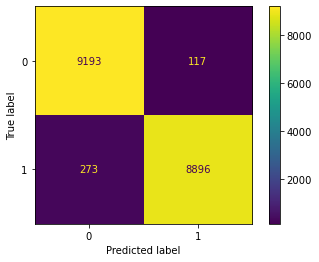

In [52]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9788949618485849

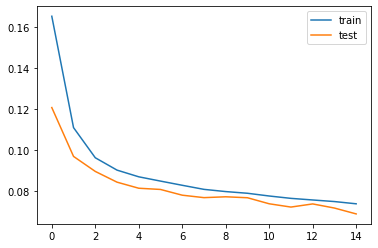

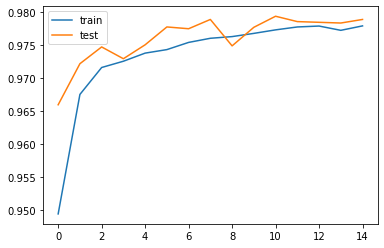

In [54]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

### Model 4

In [55]:

model5 = keras.Sequential()
model5.add(keras.layers.Dense(20,input_shape=(5,)))
model5.add(keras.layers.Dense(20,activation="relu",kernel_initializer='glorot_normal'))
model5.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer='glorot_normal'))
model5.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model5.fit(X_train, y_train, epochs=20, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/20
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1748 - Accuracy: 0.9429 - val_loss: 0.1159 - val_Accuracy: 0.9650
Epoch 2/20
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1095 - Accuracy: 0.9688 - val_loss: 0.0993 - val_Accuracy: 0.9699
Epoch 3/20
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0984 - Accuracy: 0.9714 - val_loss: 0.0920 - val_Accuracy: 0.9731
Epoch 4/20
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0929 - Accuracy: 0.9716 - val_loss: 0.0904 - val_Accuracy: 0.9728
Epoch 5/20
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0892 - Accuracy: 0.9728 - val_loss: 0.0844 - val_Accuracy: 0.9731
Epoch 6/20
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0866 - Accuracy: 0.9736 - val_loss: 0.0811 - val_Accuracy: 0.9752
Epoch 7/20
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0839 - Accuracy: 0.9737 - val_loss: 0.0809 - val_Accuracy:

In [56]:
scores=model5.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.0289 - Accuracy: 0.9909


In [57]:
y_pred = model5.predict(X_test)
y_pred


578/578 [==============================] - 1s 1ms/step


array([[9.5875594e-06],
       [1.0000000e+00],
       [1.1710548e-03],
       ...,
       [2.8829743e-06],
       [9.8793322e-01],
       [3.9169613e-02]], dtype=float32)

In [58]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9224   86]
 [  82 9087]]


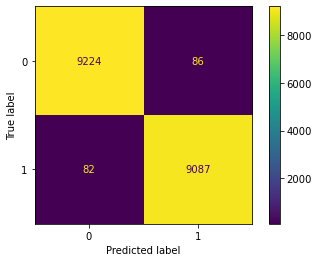

In [60]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9909085989501596

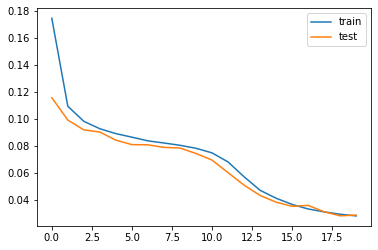

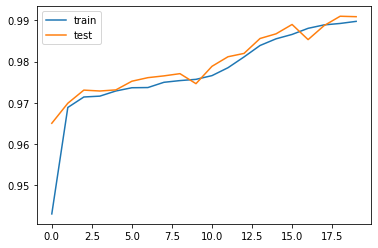

In [62]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

### Model 5

In [63]:
model6 = keras.Sequential()
model6.add(keras.layers.Dense(20,input_shape=(5,)))
model6.add(keras.layers.Dense(20,activation="relu",kernel_initializer='RandomNormal'))
model6.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer='RandomNormal'))
model6.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model6.fit(X_train, y_train, epochs=15, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 4s 2ms/step - loss: 0.1921 - Accuracy: 0.9482 - val_loss: 0.1294 - val_Accuracy: 0.9627
Epoch 2/15
1348/1348 [==============================] - 6s 4ms/step - loss: 0.1265 - Accuracy: 0.9650 - val_loss: 0.1147 - val_Accuracy: 0.9677
Epoch 3/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1139 - Accuracy: 0.9682 - val_loss: 0.1104 - val_Accuracy: 0.9683
Epoch 4/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1078 - Accuracy: 0.9696 - val_loss: 0.1025 - val_Accuracy: 0.9694
Epoch 5/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1033 - Accuracy: 0.9705 - val_loss: 0.0992 - val_Accuracy: 0.9720
Epoch 6/15
1348/1348 [==============================] - 4s 3ms/step - loss: 0.1006 - Accuracy: 0.9705 - val_loss: 0.0963 - val_Accuracy: 0.9723
Epoch 7/15
1348/1348 [==============================] - 4s 3ms/step - loss: 0.0993 - Accuracy: 0.9708 - val_loss: 0.0942 - val_Accuracy:

In [64]:
scores=model6.evaluate(X_test,y_test)

578/578 [==============================] - 1s 1ms/step - loss: 0.0942 - Accuracy: 0.9719


In [65]:
y_pred = model6.predict(X_test)
y_pred

578/578 [==============================] - 1s 942us/step


array([[2.0301349e-04],
       [1.0000000e+00],
       [5.5661339e-02],
       ...,
       [1.9975998e-04],
       [9.8810661e-01],
       [8.9121006e-02]], dtype=float32)

In [66]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9120  190]
 [ 330 8839]]


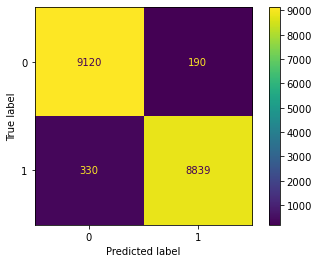

In [68]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9718599491314465

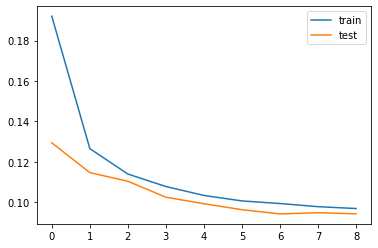

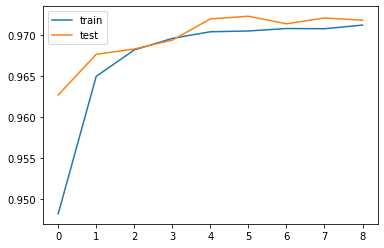

In [70]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

### Model 6

In [71]:
model7 = keras.Sequential()
model7.add(keras.layers.Dense(20,input_shape=(5,)))
model7.add(keras.layers.Dense(20,activation="relu"))
model7.add(keras.layers.Dense(1,activation="sigmoid"))
model7.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model7.fit(X_train, y_train, epochs=15, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1711 - Accuracy: 0.9486 - val_loss: 0.1153 - val_Accuracy: 0.9663
Epoch 2/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.1071 - Accuracy: 0.9682 - val_loss: 0.1013 - val_Accuracy: 0.9694
Epoch 3/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0967 - Accuracy: 0.9702 - val_loss: 0.0899 - val_Accuracy: 0.9720
Epoch 4/15
1348/1348 [==============================] - 2s 2ms/step - loss: 0.0909 - Accuracy: 0.9716 - val_loss: 0.0897 - val_Accuracy: 0.9714
Epoch 5/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0847 - Accuracy: 0.9736 - val_loss: 0.0782 - val_Accuracy: 0.9760
Epoch 6/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0758 - Accuracy: 0.9758 - val_loss: 0.0675 - val_Accuracy: 0.9776
Epoch 7/15
1348/1348 [==============================] - 3s 2ms/step - loss: 0.0649 - Accuracy: 0.9784 - val_loss: 0.0591 - val_Accuracy:

In [72]:
scores=model7.evaluate(X_test,y_test)

578/578 [==============================] - 1s 1ms/step - loss: 0.0292 - Accuracy: 0.9898


In [73]:
y_pred = model7.predict(X_test)
y_pred

578/578 [==============================] - 1s 853us/step


array([[4.5672555e-06],
       [1.0000000e+00],
       [1.3766990e-03],
       ...,
       [1.4075647e-06],
       [9.9966007e-01],
       [3.3829663e-02]], dtype=float32)

In [74]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9897721738189296

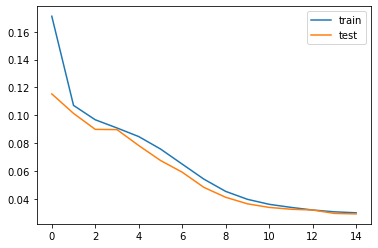

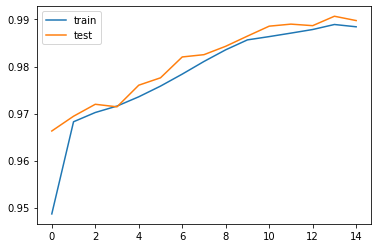

In [76]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9225   85]
 [ 104 9065]]


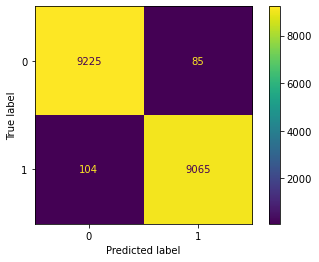

In [78]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()